In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import csv
import matplotlib.ticker as mtick

file_to_load = "../Resources/global_population_1970_2020_51_years.csv"

global_pop = pd.read_csv(file_to_load)

global_pop.head()


#Next Step - clense

,Year,World Population,Yearly,Net,Density,Urban,Urban.1,Unnamed: 7,Data link
0,NaN,NaN,Change,Change,(P/Km²),Pop,Pop %,NaN,https://www.worldometers.info/world-population...
1,2020.0,"7,794,798,739",1.05%,"81,330,639",52,"4,378,993,944",56%,NaN,NaN
2,2019.0,"7,713,468,100",1.08%,"82,377,060",52,"4,299,438,618",56%,NaN,NaN
3,2018.0,"7,631,091,040",1.10%,"83,232,115",51,"4,219,817,318",55%,NaN,NaN
4,2017.0,"7,547,858,925",1.12%,"83,836,876",51,"4,140,188,594",55%,NaN,NaN


In [2]:
global_pop.dtypes

Year                float64
World Population     object
Yearly               object
Net                  object
Density              object
Urban                object
Urban.1              object
Unnamed: 7          float64
Data link            object
dtype: object

In [3]:
global_pop = global_pop.drop(global_pop.index[0])

In [4]:
global_pop.head()

,Year,World Population,Yearly,Net,Density,Urban,Urban.1,Unnamed: 7,Data link
1,2020.0,"7,794,798,739",1.05%,"81,330,639",52,"4,378,993,944",56%,NaN,NaN
2,2019.0,"7,713,468,100",1.08%,"82,377,060",52,"4,299,438,618",56%,NaN,NaN
3,2018.0,"7,631,091,040",1.10%,"83,232,115",51,"4,219,817,318",55%,NaN,NaN
4,2017.0,"7,547,858,925",1.12%,"83,836,876",51,"4,140,188,594",55%,NaN,NaN
5,2016.0,"7,464,022,049",1.14%,"84,224,910",50,"4,060,652,683",54%,NaN,NaN


In [5]:
# strip the percentage sign from column
global_pop['Yearly'] = global_pop['Yearly'].str.replace('%', '')
# convert column to numeric 
global_pop['Yearly'] = global_pop['Yearly'].astype(float)
# divide column by 100 to get decimal 


In [6]:
global_pop.head()

,Year,World Population,Yearly,Net,Density,Urban,Urban.1,Unnamed: 7,Data link
1,2020.0,"7,794,798,739",1.05,"81,330,639",52,"4,378,993,944",56%,NaN,NaN
2,2019.0,"7,713,468,100",1.08,"82,377,060",52,"4,299,438,618",56%,NaN,NaN
3,2018.0,"7,631,091,040",1.10,"83,232,115",51,"4,219,817,318",55%,NaN,NaN
4,2017.0,"7,547,858,925",1.12,"83,836,876",51,"4,140,188,594",55%,NaN,NaN
5,2016.0,"7,464,022,049",1.14,"84,224,910",50,"4,060,652,683",54%,NaN,NaN


In [7]:
global_pop_only = global_pop.drop(['Net', 'Density', 'Urban', 'Urban.1', 'Unnamed: 7', 'Data link'],axis=1)


In [8]:
global_pop_only

,Year,World Population,Yearly
1,2020.0,"7,794,798,739",1.05
2,2019.0,"7,713,468,100",1.08
3,2018.0,"7,631,091,040",1.10
4,2017.0,"7,547,858,925",1.12
5,2016.0,"7,464,022,049",1.14
6,2015.0,"7,379,797,139",1.16
7,2014.0,"7,295,290,765",1.17
8,2013.0,"7,210,581,976",1.19
9,2012.0,"7,125,828,059",1.20
10,2011.0,"7,041,194,301",1.21


In [9]:
global_urbanisation_only = global_pop.drop(['World Population', 'Yearly', 'Unnamed: 7', 'Data link'],axis=1)

In [10]:
global_urbanisation_only.head()

,Year,Net,Density,Urban,Urban.1
1,2020.0,"81,330,639",52,"4,378,993,944",56%
2,2019.0,"82,377,060",52,"4,299,438,618",56%
3,2018.0,"83,232,115",51,"4,219,817,318",55%
4,2017.0,"83,836,876",51,"4,140,188,594",55%
5,2016.0,"84,224,910",50,"4,060,652,683",54%


In [11]:
global_urbanisation_only.rename(columns={'Urban.1': 'Percentage Change'}, inplace=True)
global_urbanisation_only.rename(columns={'Net': 'Net Global Growth'}, inplace=True)
global_urbanisation_only.rename(columns={'Density': 'Density per SqKlm'}, inplace=True)
global_urbanisation_only.rename(columns={'Urban': 'Urban Change'}, inplace=True)

global_urbanisation_only.head()

,Year,Net Global Growth,Density per SqKlm,Urban Change,Percentage Change
1,2020.0,"81,330,639",52,"4,378,993,944",56%
2,2019.0,"82,377,060",52,"4,299,438,618",56%
3,2018.0,"83,232,115",51,"4,219,817,318",55%
4,2017.0,"83,836,876",51,"4,140,188,594",55%
5,2016.0,"84,224,910",50,"4,060,652,683",54%


In [12]:
global_urbanisation_only.head()

,Year,Net Global Growth,Density per SqKlm,Urban Change,Percentage Change
1,2020.0,"81,330,639",52,"4,378,993,944",56%
2,2019.0,"82,377,060",52,"4,299,438,618",56%
3,2018.0,"83,232,115",51,"4,219,817,318",55%
4,2017.0,"83,836,876",51,"4,140,188,594",55%
5,2016.0,"84,224,910",50,"4,060,652,683",54%


In [13]:
# converting Year to integer
global_urbanisation_only['Year'] = global_urbanisation_only['Year'].astype('int64')

In [14]:
# strip the percentage sign from column
global_urbanisation_only['Percentage Change'] = global_urbanisation_only['Percentage Change'].str.replace('%', '')
# convert column to numeric 
global_urbanisation_only['Percentage Change'] = global_urbanisation_only['Percentage Change'].astype(float)



In [15]:
# divide column by 100 to get decimal 
global_urbanisation_only['Percentage Change'] = global_urbanisation_only['Percentage Change']/100
global_urbanisation_only['Percentage Change']

1     0.56
2     0.56
3     0.55
4     0.55
5     0.54
6     0.54
7     0.53
8     0.53
9     0.53
10    0.52
11    0.52
12    0.51
13    0.51
14    0.50
15    0.50
16    0.49
17    0.49
18    0.48
19    0.48
20    0.47
21    0.47
22    0.46
23    0.46
24    0.46
25    0.45
26    0.45
27    0.44
28    0.44
29    0.44
30    0.43
31    0.43
32    0.43
33    0.42
34    0.42
35    0.42
36    0.41
37    0.41
38    0.41
39    0.40
40    0.40
41    0.39
42    0.39
43    0.39
44    0.38
45    0.38
46    0.38
47    0.37
48    0.37
49    0.37
50    0.37
51    0.37
Name: Percentage Change, dtype: float64

In [16]:
global_urbanisation_only.head()

,Year,Net Global Growth,Density per SqKlm,Urban Change,Percentage Change
1,2020,"81,330,639",52,"4,378,993,944",0.56
2,2019,"82,377,060",52,"4,299,438,618",0.56
3,2018,"83,232,115",51,"4,219,817,318",0.55
4,2017,"83,836,876",51,"4,140,188,594",0.55
5,2016,"84,224,910",50,"4,060,652,683",0.54


In [17]:
global_urban_movement_1990_to_2015 = global_urbanisation_only[global_urbanisation_only['Year']<=2015]
global_urban_movement_1990_to_2015 = global_urban_movement_1990_to_2015[global_urban_movement_1990_to_2015['Year']>=1990]
global_urban_movement_1990_to_2015

,Year,Net Global Growth,Density per SqKlm,Urban Change,Percentage Change
6,2015,"84,506,374",50,"3,981,497,663",0.54
7,2014,"84,708,789",49,"3,902,831,934",0.53
8,2013,"84,753,917",48,"3,824,990,329",0.53
9,2012,"84,633,758",48,"3,747,842,586",0.53
10,2011,"84,370,698",47,"3,671,423,872",0.52
11,2010,"84,056,510",47,"3,594,868,146",0.52
12,2009,"83,678,407",46,"3,516,830,263",0.51
13,2008,"83,142,076",46,"3,439,719,128",0.51
14,2007,"82,428,777",45,"3,363,609,560",0.50
15,2006,"81,610,806",44,"3,289,446,226",0.50


In [18]:
global_pop_only_change_1990_to_2015 = global_pop_only[global_pop_only['Year']<=2015]
global_pop_only_change_1990_to_2015 = global_pop_only_change_1990_to_2015[global_pop_only_change_1990_to_2015['Year']>=1990]
global_pop_only_change_1990_to_2015.rename(columns={'Yearly': 'Percentage Change'}, inplace=True)
global_pop_only_change_1990_to_2015['Year'] = global_pop_only_change_1990_to_2015['Year'].astype('int64')
global_pop_only_change_1990_to_2015

,Year,World Population,Percentage Change
6,2015,"7,379,797,139",1.16
7,2014,"7,295,290,765",1.17
8,2013,"7,210,581,976",1.19
9,2012,"7,125,828,059",1.20
10,2011,"7,041,194,301",1.21
11,2010,"6,956,823,603",1.22
12,2009,"6,872,767,093",1.23
13,2008,"6,789,088,686",1.24
14,2007,"6,705,946,610",1.24
15,2006,"6,623,517,833",1.25


In [19]:
# convert necessary columns to numeric for plotting


(1.0, 2.0)

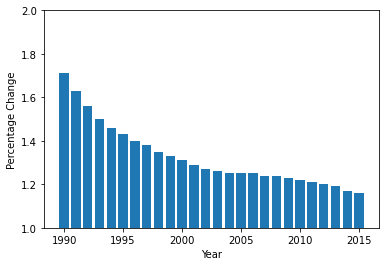

In [20]:
plt.bar(global_pop_only_change_1990_to_2015['Year'], global_pop_only_change_1990_to_2015['Percentage Change'])
plt.ylabel('Percentage Change')
plt.xlabel('Year')
plt.ylim(1,2)

NameError: name 'fig' is not defined

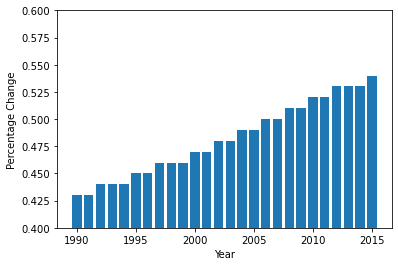

In [21]:
plt.bar(global_urban_movement_1990_to_2015['Year'], global_urban_movement_1990_to_2015['Percentage Change'])
plt.ylabel('Percentage Change')
plt.xlabel('Year')
plt.ylim(0.4,0.6)
fig.yaxis.set_major_formatter(mtick.PercentFormatter())


In [ ]:
pd.to_numeric(global_urban_movement_1990_to_2015['Percentage Change'])
